In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader as pdd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [2]:
df = pdd.DataReader('TATAMOTORS.NS', data_source = 'yahoo', start = '2012-10-12',end = '2021-10-11')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-12,271.438538,267.035767,270.894379,268.371460,7601135.0,265.314880
2012-10-15,268.371460,263.375031,267.777802,266.541077,4803032.0,263.505341
2012-10-16,263.127686,258.428101,262.187775,259.516418,9626107.0,256.560699
2012-10-17,264.859131,258.230225,262.187775,262.088837,7653892.0,259.103821
2012-10-18,268.915619,263.177155,263.177155,267.382050,6699061.0,264.336731
...,...,...,...,...,...,...
2021-10-05,351.500000,338.850006,340.450012,344.950012,31861985.0,344.950012
2021-10-06,348.700012,335.000000,347.000000,336.049988,25272592.0,336.049988
2021-10-07,383.000000,339.250000,341.100006,376.500000,163238084.0,376.500000


<function matplotlib.pyplot.show(close=None, block=None)>

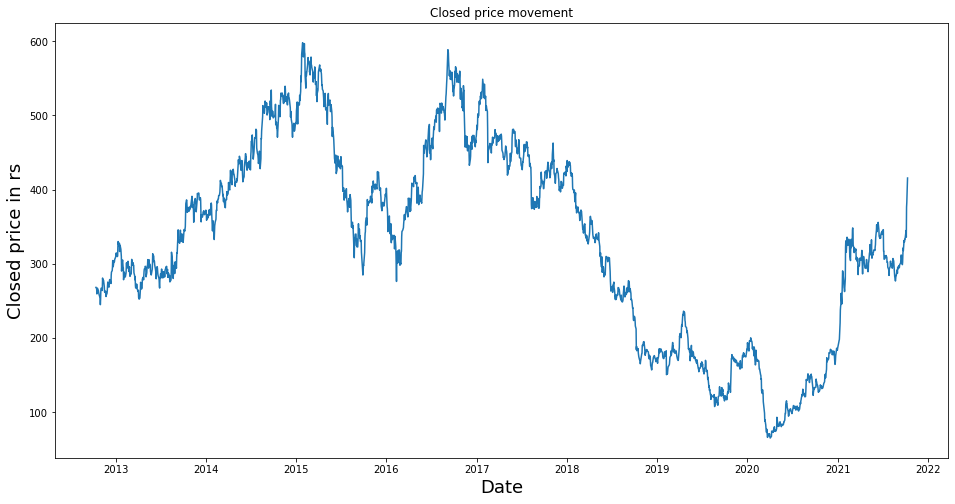

In [3]:
plt.figure(figsize = (16,8))
plt.title('Closed price movement')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed price in rs', fontsize = 18)
plt.show

In [4]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

2213

In [5]:
training_data_size = int(np.ceil(len(dataset)*0.7))
training_data_size

1550

In [6]:
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(2213, 1)

In [7]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print(x_train,y_train)
                

[array([0.38111552, 0.37768034, 0.36449677, 0.36932457, 0.37925864,
       0.37693761, 0.37331674, 0.36876752, 0.3625471 , 0.35419134,
       0.33729409, 0.35047766, 0.37405953, 0.37888727, 0.37842307,
       0.37313106, 0.37758749, 0.40469736, 0.39847694, 0.39875546,
       0.38297234, 0.36951025, 0.36783911, 0.37155276, 0.37043866,
       0.35790498, 0.36115448, 0.36616791, 0.37257401, 0.39448471,
       0.38520053, 0.38269382, 0.38167257, 0.38798583, 0.39894115,
       0.40089081, 0.39727   , 0.39383482, 0.3908639 , 0.41203187,
       0.41983059, 0.42345146, 0.43143586, 0.44889012, 0.44359812,
       0.43338552, 0.44740466, 0.44582636, 0.45158252, 0.45316088,
       0.45798862, 0.46560166, 0.46792274, 0.46810843, 0.46309494,
       0.45910277, 0.46077391, 0.48528417, 0.49707512, 0.49094754])] [0.4859340543848504]
[array([0.38111552, 0.37768034, 0.36449677, 0.36932457, 0.37925864,
       0.37693761, 0.37331674, 0.36876752, 0.3625471 , 0.35419134,
       0.33729409, 0.35047766, 0.3740

In [8]:
# 3 D dataset
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1490, 60, 1)

LSTM

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences =True , input_shape =(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False)) 
model.add(Dense(25))
model.add(Dense(1))

In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
model.fit(x_train,y_train, batch_size = 1, epochs = 1)

1490/1490 [==============================] - 45s 29ms/step - loss: 0.0026


In [12]:
test_data = scaled_data[training_data_size - 60:, :]
x_test = []
y_test  = dataset[training_data_size:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
x_test = np.array(x_test)

In [14]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [15]:
predictions= model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.69121197086294

<ipython-input-23-311bc8f4a3f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["predictions"]= predictions


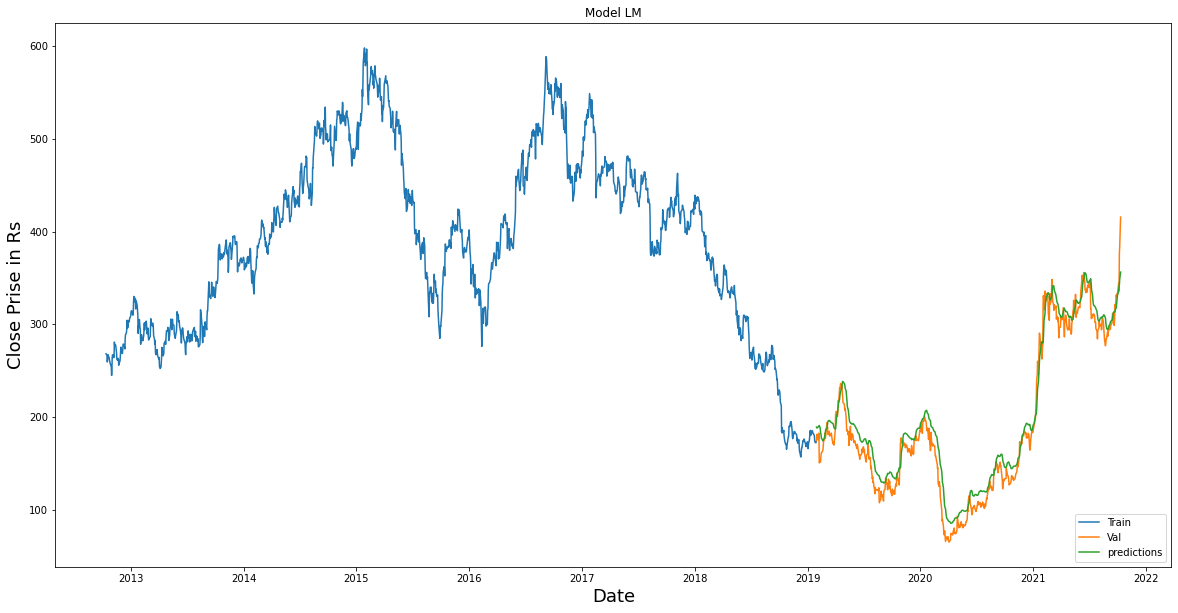

In [23]:
# import matplotlib.pyplot as plt
train = data[:training_data_size]
valid = data[training_data_size:]
valid["predictions"]= predictions
plt.figure(figsize = (20,10))
plt.title('Model LM')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Prise in Rs', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'], loc = 'lower right')
plt.show()

In [25]:
valid

,Close,predictions
Date,,
2019-01-30,174.600006,189.235794
2019-01-31,181.199997,188.314072
2019-02-01,181.649994,188.428787
2019-02-04,180.250000,189.114868
2019-02-05,175.800003,189.872269
...,...,...
2021-10-05,344.950012,337.487244
2021-10-06,336.049988,340.709778
2021-10-07,376.500000,342.464203
